<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [4]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [5]:
from bs4 import BeautifulSoup
import requests
url = './data/job_listings.csv'
##### Your Code Here #####
df = pd.read_csv(url)
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [7]:
def drink_soup(src):
    soup = BeautifulSoup(src[2:-1], 'html.parser')
    return (soup.text.lower()
            .replace(':', ' ')
            .replace('\\n', ' ')
            .replace('\\', ' ')
            .replace(', ', ' ')
            .replace('/', ' ')
            .lower()
    )

In [8]:
def clean_str(s):
    return re.sub(r'[^a-z]', '', s.lower())

In [9]:
jobs = pd.read_csv(url)
jobs = jobs.drop(columns=['Unnamed: 0'])
jobs = jobs[['title', 'description']]
jobs['description'] = jobs['description'].apply(drink_soup)
jobs['description']

0      job requirements  conceptual understanding in ...
1      job description  as a data scientist 1 you wil...
2      as a data scientist you will be working on con...
3      $4,969 - $6,756 a monthcontractunder the gener...
4      location  usa  xe2 x80 x93 multiple locations ...
                             ...                        
421    about us  want to be part of a fantastic and f...
422    internshipat uber we ignite opportunity by set...
423    $200,000 - $350,000 a yeara million people a y...
424    senior data scientist job description  about u...
425    cerner intelligence is a new innovative organi...
Name: description, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings 

In [10]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")

In [11]:
lemma = []
for text in jobs['description']:
    doc = nlp(text)
    lemma.append([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])
jobs['lemma'] = lemma
jobs.head()

,title,description,lemma
0,Data scientist,job requirements conceptual understanding in ...,"[job, requirement, , conceptual, understandin..."
1,Data Scientist I,job description as a data scientist 1 you wil...,"[job, description, , data, scientist, 1, help..."
2,Data Scientist - Entry Level,as a data scientist you will be working on con...,"[data, scientist, work, consult, business, res..."
3,Data Scientist,"$4,969 - $6,756 a monthcontractunder the gener...","[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,Data Scientist,location usa xe2 x80 x93 multiple locations ...,"[location, , usa, , xe2, x80, x93, multiple,..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [12]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text =jobs['description']

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

In [13]:
type(dtm.todense())

numpy.matrix

In [14]:
text[:25]

0     job requirements  conceptual understanding in ...
1     job description  as a data scientist 1 you wil...
2     as a data scientist you will be working on con...
3     $4,969 - $6,756 a monthcontractunder the gener...
4     location  usa  xe2 x80 x93 multiple locations ...
5     create various business intelligence analytica...
6     as spotify premium swells to over 96m subscrib...
7     everytown for gun safety the nation's largest ...
8     ms in a quantitative discipline such as statis...
9     slack is hiring experienced data scientists to...
10    who we are blackthorn therapeutics is a comput...
11    part-timeabout the opportunity here at grubhub...
12    nfosys xe2 x80 x93 data & analytics  xe2 x80 x...
13    as spotify premium swells to over 96m subscrib...
14    experience with guiding r&d strategy for your ...
15    the atlantic is seeking a data scientist to he...
16    the challenge eventbrite is big bustling marke...
17    contractwe are looking to hire for a data 

In [15]:
print(dtm)

  (0, 230)	2
  (0, 509)	1
  (0, 580)	2
  (0, 620)	2
  (0, 648)	1
  (0, 674)	1
  (0, 688)	1
  (0, 710)	1
  (0, 769)	1
  (0, 932)	1
  (0, 1090)	1
  (0, 1493)	1
  (0, 1551)	1
  (0, 1635)	1
  (0, 1713)	1
  (0, 1724)	1
  (0, 2101)	1
  (0, 2162)	1
  (0, 2197)	1
  (0, 2522)	1
  (0, 2659)	1
  (0, 2893)	1
  (0, 3007)	2
  (0, 3024)	1
  (0, 3055)	1
  :	:
  (425, 8374)	1
  (425, 8395)	1
  (425, 8444)	1
  (425, 8468)	2
  (425, 8505)	1
  (425, 8511)	1
  (425, 8513)	1
  (425, 8519)	2
  (425, 8532)	3
  (425, 8534)	2
  (425, 8548)	10
  (425, 8550)	2
  (425, 8551)	1
  (425, 8561)	7
  (425, 8567)	1
  (425, 8570)	2
  (425, 8573)	1
  (425, 8597)	5
  (425, 8610)	2
  (425, 8646)	3
  (425, 8714)	5
  (425, 8727)	2
  (425, 8733)	1
  (425, 8738)	3
  (425, 8740)	1


In [16]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [18]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data = jobs['description']
data[0][:25]

'job requirements  concept'

In [21]:
len(data)

426

## 4) Visualize the most common word counts

In [22]:
##### Your Code Here #####
dtm.sum().sort_values(ascending=False)[:50]

and            11754
to              6942
the             5549
of              4614
data            4466
in              3638
with            3076
for             2079
or              1936
experience      1854
you             1829
we              1715
our             1565
is              1455
xe2             1417
x80             1404
will            1316
as              1272
business        1212
on              1205
work            1161
that            1033
are             1022
be               995
team             988
science          958
learning         919
an               877
analytics        736
at               735
machine          699
skills           697
analysis         680
from             660
models           617
have             611
product          583
this             582
statistical      576
x99s             564
by               545
solutions        530
new              529
ability          513
scientist        511
other            481
all              472
your         

<AxesSubplot:>

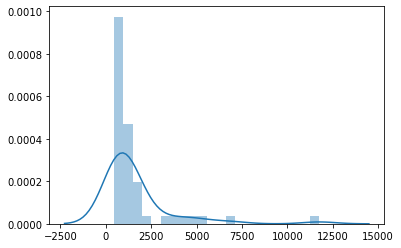

In [23]:
import seaborn as sns

sns.distplot(dtm.sum().sort_values(ascending=False)[:50])

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [24]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,04,10,100,1000,1079302,11,12,125,...,yes,yeti,york,young,yrs,zenreach,zeus,zf,zillow,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [26]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,0,1,10,2,3,4,40,5,6,...,year xe2,yearthe,yes,york,york,york city,york office,yrs,|,||
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
dtm.shape

(426, 12346)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [28]:
##### Your Code Here #####
dtm.head()

,,0,1,10,2,3,4,40,5,6,...,year xe2,yearthe,yes,york,york,york city,york office,yrs,|,||
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [30]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.31028576, 1.3109647 , 1.32517116, 1.32615886]]),
 array([[  0, 115, 274, 336, 338]], dtype=int64))

In [31]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.26299671, 1.27427477, 1.27470584, 1.28157239]]),
 array([[256, 201, 399, 410, 199]], dtype=int64))

In [32]:
data[256][:200]

'role summary  the ccs data scientist is responsible for supporting the ccs digital service operations teams with data analytics that drive improved remote service efficiency and improved customer expe'

In [33]:
data[121][:200]

'part-timethe nittany artificial intelligence (ai) alliance at the pennsylvania state university (psu) is looking for a talented and highly motivated undergraduate intern to work on ai-related projects'

In [34]:
job_description = ["""
A data science job that pays $100,000 a year. Located in Los Angeles and has a 401k plan.
"""]

In [35]:
# Query for job
new = tfidf.transform(job_description)

In [36]:
new

<1x12346 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [37]:
nn.kneighbors(new.todense())

(array([[1.27563623, 1.33880797, 1.34199314, 1.34937944, 1.34937944]]),
 array([[ 19, 387, 244, 315, 207]], dtype=int64))

In [38]:
# Inspect Most relevant result
data[19]

'$70,000 - $100,000 a yeartitle  data analyst jr. data scientist locations  charleston sc salary  $70-100k (dependent upon experience  qualifications   2+ years of database development architecture experience (sql) experience with data visualization tools such as tableau (sisense preferred) expertise in ms excel preferred   degree in computer science experience with r and or python experience working with spark machine learning experience a bit about the company   in the a.i. space great company culture office environment amazing benefits industry disruptive organization'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 